In [1]:
import pandas as pd
import numpy as np

In [2]:
zip_df = pd.read_pickle("../data/zip_df_full.pkl")
zip_df.head()

,zipcode,med_income,med_home_value,pop_density,home_count,land_area,NREL_PSM_2019,cost_electricity,avg_contractor_wage,housing_density,install_count,percent_homes,install_level
0,01001,58733.0,213000.0,1466.0,7557.0,11.44,4.575282,21.92,65846.0,660.576923,102.0,0.013497,5
1,01002,54422.0,338900.0,528.0,10388.0,55.04,4.593613,21.92,53390.0,188.735465,531.0,0.051117,6
3,01005,68644.0,208500.0,115.0,2044.0,44.24,4.677823,21.92,66248.0,46.202532,55.0,0.026908,5
4,01007,71875.0,260000.0,278.0,5839.0,52.64,4.559018,21.92,53390.0,110.923252,272.0,0.046583,6
5,01008,71635.0,247200.0,23.0,586.0,53.80,4.607418,21.92,65846.0,10.892193,21.0,0.035836,6


In [3]:
install_df = pd.read_pickle("../data/bk_P_rt.pkl")
install_df.head()

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,zip_code,battery_rated_capacity_kWh,ground_mounted,third_party_owned,install_month,cost_per_kW,days_from_first
0,2010-04-29,2.016,14558.0,0.0,71953,0.0,0.0,0.0,2010-04-30,7221.230159,0
1,2010-04-26,3.360,26096.0,0.0,72641,0.0,0.0,0.0,2010-04-30,7766.666667,0
2,2010-04-20,13.440,91139.0,0.0,71801,0.0,0.0,0.0,2010-04-30,6781.175595,0
3,2010-04-21,5.520,40043.0,0.0,71909,0.0,0.0,0.0,2010-04-30,7254.166667,0
4,2010-04-22,2.530,21497.0,0.0,71909,0.0,0.0,0.0,2010-04-30,8496.837945,0


In [4]:
pred_df = pd.read_pickle("../data/zc_pair.pkl")
pred_df.head()

,med_income,med_home_value,pop_density,NREL_PSM_2019,cost_electricity,avg_contractor_wage,percent_homes,prediction,performance_vs_expectation,zipcode
0,58733.0,213000.0,1466.0,4.575282,21.92,65846.0,0.013497,0.026328,-0.487337,01001
1,54422.0,338900.0,528.0,4.593613,21.92,53390.0,0.051117,0.029316,0.743672,01002
3,68644.0,208500.0,115.0,4.677823,21.92,66248.0,0.026908,0.030010,-0.103370,01005
4,71875.0,260000.0,278.0,4.559018,21.92,53390.0,0.046583,0.031139,0.495967,01007
5,71635.0,247200.0,23.0,4.607418,21.92,65846.0,0.035836,0.030425,0.177850,01008


In [6]:
pred_df_91708 = pred_df.copy()
p_v = pred_df_91708[pred_df_91708.zipcode == '91708'].prediction
pred_df_91708['sim'] = pred_df_91708.prediction.apply(lambda z: abs(z - p_v))
top_10 = pred_df_91708.sort_values(by = 'sim').head(10).zipcode

In [23]:
top_10_install = install_df[install_df.zip_code.isin(list(top_10))].groupby(
    ['zip_code','install_month']
).system_size_DC.count().reset_index().rename(
    columns = {'system_size_DC':'count'})



top_10_install['zip_code'] = top_10_install['zip_code'].astype(str).apply(lambda x: 'z' + x)


#top_10_install['ct_3day_avg'] = top_10_install.groupby('zipcode').count.rolling(3).mean().shift(-1).reset_index()
top_10_install['ct_3mo_avg'] = top_10_install.groupby('zip_code')['count'].transform(lambda s: s.rolling(3, min_periods=1).mean())
top_10_install.head()

,zip_code,install_month,count,ct_3mo_avg
0,z91008,2009-02-28,1,1.0
1,z91008,2009-05-31,1,1.0
2,z91008,2013-08-31,1,1.0
3,z91008,2014-01-31,1,1.0
4,z91008,2014-09-30,1,1.0


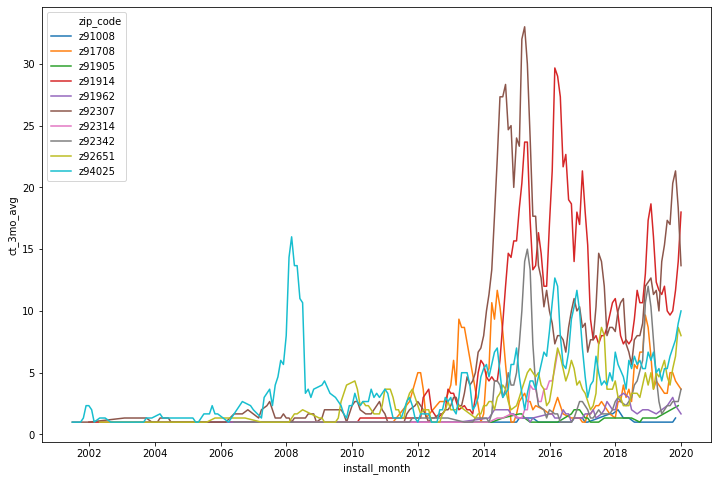

In [24]:
from matplotlib import pyplot
import seaborn as sns

dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)

sns.lineplot(ax = ax, data=top_10_install, x="install_month", y="ct_3mo_avg", hue = 'zip_code')

In [17]:
top_10_install.dtypes

zip_code                 object
install_month    datetime64[ns]
count                     int64
dtype: object

In [25]:
diff_df = pd.read_pickle("../data/diff_df_mo.pkl")
diff_df.head()

,index,longitude,implementing_sector_id,name,fromSir,start_date_text,created_ts,additional_technologies,city_id,end_date,...,created_by_user_id,is_entire_state,end_date_text,latitude,id,install_month,end_month,num_months,num_end_months,s_e
0,0,-105.0,3,Xcel Energy - Net Metering,0,None,2003-09-05 00:00:00,None,25521.0,None,...,534,0,None,40.0,9,2003-09-30,NaT,65,NaN,"(65, nan)"
1,1,-105.0,3,Xcel Energy - Net Metering,0,None,2003-09-05 00:00:00,None,25521.0,None,...,534,0,None,40.0,9,2003-09-30,NaT,65,NaN,"(65, nan)"
2,2,-105.0,3,Xcel Energy - Net Metering,0,None,2003-09-05 00:00:00,None,25521.0,None,...,534,0,None,40.0,9,2003-09-30,NaT,65,NaN,"(65, nan)"
3,3,-105.0,3,Xcel Energy - Net Metering,0,None,2003-09-05 00:00:00,None,25521.0,None,...,534,0,None,40.0,9,2003-09-30,NaT,65,NaN,"(65, nan)"
4,4,-105.0,3,Xcel Energy - Net Metering,0,None,2003-09-05 00:00:00,None,25521.0,None,...,534,0,None,40.0,9,2003-09-30,NaT,65,NaN,"(65, nan)"


In [28]:
diff_df[(diff_df.zipcode == '94025') & (diff_df.is_entire_state == 0)].sort_values(by = 'num_months')

,index,longitude,implementing_sector_id,name,fromSir,start_date_text,created_ts,additional_technologies,city_id,end_date,...,created_by_user_id,is_entire_state,end_date_text,latitude,id,install_month,end_month,num_months,num_end_months,s_e
633,1980,-122.0,3,Palo Alto Utilities - Remote Renewables Program,0,None,2000-01-01 00:00:00,None,27922.0,None,...,534,0,None,37.0,116,2000-01-31,NaT,21,NaN,"(21, nan)"
4742,6847,-122.0,2,Palo Alto - Solar Access,0,None,2000-01-01 00:00:00,None,27922.0,None,...,534,0,None,37.0,445,2000-01-31,NaT,21,NaN,"(21, nan)"
29311,110124,-122.0,1,California Solar Initiative - PV Incentives,0,None,2006-12-08 00:00:00,None,27922.0,None,...,534,0,None,37.0,2362,2007-01-31,NaT,105,NaN,"(105, nan)"
36438,142153,-122.0,1,CEC - New Solar Homes Partnership,0,None,2007-01-09 00:00:00,None,27922.0,None,...,492,0,None,37.0,2744,2007-01-31,NaT,105,NaN,"(105, nan)"
39018,152031,-122.0,3,City of Palo Alto Utilities - Renewable Energy...,0,None,2008-02-14 00:00:00,None,27922.0,None,...,492,0,None,37.0,2873,2008-02-29,NaT,118,NaN,"(118, nan)"
39508,152521,-122.0,1,Renewable Market Adjusting Tariff (ReMAT),0,2/14/2008,2008-02-28 00:00:00,None,27922.0,None,...,492,0,None,37.0,2875,2008-02-29,NaT,118,NaN,"(118, nan)"
51044,190447,-122.0,1,California Solar Initiative - Multi-Family Aff...,0,None,2009-03-20 00:00:00,None,27922.0,2021-12-31 05:00:00,...,492,0,12/31/2021,37.0,3305,2009-03-31,2021-12-31,131,284.0,"(131, 284.0)"
61104,245221,-122.0,1,California Solar Initiative - Single-Family Af...,0,7/1/2009,2009-09-16 00:00:00,None,27922.0,2021-12-31 05:00:00,...,492,0,12/31/2021,37.0,3673,2009-07-31,2021-12-31,135,284.0,"(135, 284.0)"
67460,303424,-122.0,3,PG&E - California Advanced Homes Incentives,0,1/1/2010,2010-07-28 00:00:00,None,27922.0,None,...,534,0,None,37.0,4271,2010-01-31,NaT,141,NaN,"(141, nan)"
80629,373050,-122.0,1,Renewable Auction Mechanism (RAM),0,None,2011-08-24 00:00:00,None,27922.0,None,...,492,0,None,37.0,4979,2011-08-31,NaT,160,NaN,"(160, nan)"
